# **Rodrigo_Mesquita_DR2_TP3**
## **Dados para Machine Learning: Feature Engineering [24E1_2]**

Link do Notebook: https://colab.research.google.com/drive/1Bw5SaVEcbWzUTMMYr_iEpZYozvClr43b?usp=sharing

### 1.Selecionar um conjunto de dados de análise de sentimentos binários disponível em qualquer base de dados online, excluindo aqueles abordados em aula e no TP2. Implementar as técnicas de TF-IDF, Bag-of-Words e Bag-of-nGrams para análise dos dados. Ao concluir, apresentar uma análise dos resultados obtidos. Caso o conjunto de dados apresente desbalanceamento, solicita-se a utilização de métricas adicionais além da acurácia para avaliar o desempenho dos modelos.


In [ ]:
!pip install spacy;
!python -m spacy download en_core_web_sm;

In [ ]:
import pandas as pd;
from matplotlib import pyplot as plt;
import seaborn as sns;
import sklearn as sk;
from sklearn.feature_extraction.text import CountVectorizer;
from google.colab import drive;
from sklearn.datasets import load_files;
import numpy as np;
import spacy;
from sklearn.preprocessing import OneHotEncoder;

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/movie.csv')
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


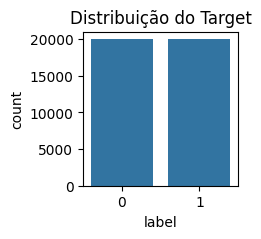

In [ ]:
plt.figure(figsize=(2,2))
plt.title('Distribuição do Target')
sns.countplot(df, x='label')
plt.show()

### Executando Leematização

In [ ]:
#!pip install nltk;
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['text_norm'] = df['text'].str.lower()

In [ ]:
import re
pattern = re.compile(r"\b[a-zA-Z]{3,}\b")
df['text_norm'] = df['text_norm'].apply(lambda x: (' '.join(pattern.findall(str(x)))))

In [ ]:
en_lemma = spacy.load('en_core_web_sm')

def lemmatize_text(doc):
    doc_spacy = en_lemma(doc)
    lemmatized_text = [token.lemma_ for token in doc_spacy]
    return lemmatized_text

df['text_lem'] = df['text_norm'].apply(lemmatize_text)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Salvei o resultado da leematização para não precisar executar outras vezes devido ao tempo elevado de processamento.

In [ ]:
caminho = '/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/movie_norm.csv'

df.to_csv(caminho, index=False)

In [ ]:
df_norm = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/movie_norm.csv')

In [ ]:
df_norm

,text,label,text_norm,text_lem
0,I grew up (b. 1965) watching and loving the Th...,0,grew watching and loving the thunderbirds all ...,"['grow', 'watch', 'and', 'love', 'the', 'thund..."
1,"When I put this movie in my DVD player, and sa...",0,when put this movie dvd player and sat down wi...,"['when', 'put', 'this', 'movie', 'dvd', 'playe..."
2,Why do people who do not know what a particula...,0,why people who not know what particular time t...,"['why', 'people', 'who', 'not', 'know', 'what'..."
3,Even though I have great interest in Biblical ...,0,even though have great interest biblical movie...,"['even', 'though', 'have', 'great', 'interest'..."
4,Im a die hard Dads Army fan and nothing will e...,1,die hard dads army fan and nothing will ever c...,"['die', 'hard', 'dad', 'army', 'fan', 'and', '..."
...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,western union something forgotten classic west...,"['western', 'union', 'something', 'forget', 'c..."
39996,This movie is an incredible piece of work. It ...,1,this movie incredible piece work explores ever...,"['this', 'movie', 'incredible', 'piece', 'work..."
39997,My wife and I watched this movie because we pl...,0,wife and watched this movie because plan visit...,"['wife', 'and', 'watch', 'this', 'movie', 'bec..."
39998,"When I first watched Flatliners, I was amazed....",1,when first watched flatliners was amazed had a...,"['when', 'first', 'watch', 'flatliner', 'be', ..."


In [ ]:
x_train, y_train = df_norm['text'], df_norm['label']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Criado o Bag-of-Words
bag_words = CountVectorizer(min_df=5, stop_words='english')
bag_words.fit(x_train)
x_train_vec = bag_words.transform(x_train)

#Treinando o modelo
lregression = LogisticRegression(max_iter=200)
param_grid = {'C': [0.001, 0.1, 1.]}
grid = GridSearchCV(lregression, param_grid, cv=5)
grid.fit(x_train_vec, y_train)

In [ ]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.887475
Melhores combinações de parâmetros:  {'C': 0.1}


### Usando TF-IDF

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.pipeline import make_pipeline;

#Calculando o TF-IDF e treinando o modelo
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=200))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1]}
grid = GridSearchCV(pipe, param_grid, cv=5);
grid.fit(x_train, y_train);

In [ ]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.861175
Melhores combinações de parâmetros:  {'logisticregression__C': 0.1}


###Usando Bag-of-nGrams

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline;

#Criado o Bag-of-nGrams
bag_ngrams = CountVectorizer(ngram_range=(2, 3), min_df=5, stop_words='english')
bag_ngrams.fit(x_train)
x_train_vec = bag_ngrams.transform(x_train)

#Treinando o modelo
lregression = LogisticRegression(max_iter=100)
param_grid = {'C': [0.001, 0.1, 1.]}
grid = GridSearchCV(lregression, param_grid, cv=3)
grid.fit(x_train_vec, y_train)

In [ ]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.8453999973068173
Melhores combinações de parâmetros:  {'C': 0.1}


###2.Dado o seguinte corpus:
[[“Duas coisas são infinitas: o universo e a estupidez humana. Mas, em relação ao universo, ainda não tenho certeza absoluta.”],
[“Se A é o sucesso, então A é igual a X mais Y mais Z. O trabalho é X; Y é o lazer; e Z é manter a boca fechada.”],
[“O importante é não parar de questionar”],
[“”Triste época! É mais fácil desintegrar um átomo do que um preconceito.”]]

Calcule o TF-IDF apenas da terceira amostra.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = [["Duas coisas são infinitas: o universo e a estupidez humana. Mas, em relação ao universo, ainda não tenho certeza absoluta."], ["Se A é o sucesso, então A é igual a X mais Y mais Z. O trabalho é X; Y é o lazer; e Z é manter a boca fechada."], ["O importante é não parar de questionar"]]

#Calculando o TF-IDF somente da terceira amostra
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text[2])

#Extraindo as palavras e as pontuações TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
dense_matrix = tfidf_matrix.todense()

#Passando para um dicioário
tfidf_scores = {}
for term, score in zip(feature_names, dense_matrix.tolist()[0]):
    tfidf_scores[term] = score

#Mostrando os resultados
tfidf_scores

{'de': 0.4472135954999579,
 'importante': 0.4472135954999579,
 'não': 0.4472135954999579,
 'parar': 0.4472135954999579,
 'questionar': 0.4472135954999579}

###4.Explique os pontos positivos e negativos de vetorizar variáveis categóricas.

Pontos positivos:
1.   Obrigatório para utilização de alguns tipos algorítimos.
2.   Mesmo em modelos que aceitam variáveis categóricas, a vetorização pode otimizar o processamento e melhorar o desempenho.

Pontos negativos:
1.   Em features com uma quantidade grande de categorias distintas, pode aumentar muito a dimensionalidade, afetando negativamente o desempenho.
2.   Redução da interpretabilidade do modelo.
3.   Aumento da complexidade do pré-processamento.

###5.Utilizando o conjunto de dados do Titanic, abordado em aula, aplique pelo menos duas técnicas diferentes de vetorização de variáveis categóricas como parte do processo de pré-processamento dos dados. Implemente estas técnicas utilizando o Pipeline do scikit-learn.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/Titanic-Dataset.csv')

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [ ]:
# Definindo as transformações do pipeline
preproc_pipeline_x = ColumnTransformer(transformers=[
        ('onehot', OneHotEncoder(), ['Sex']),
        ('dummie', OneHotEncoder(drop='first'), ['Embarked']),
        ('additional_cols', 'passthrough', ['Pclass', 'Age','SibSp','Parch','Fare'])
], remainder='drop')

#Aplicando o pipeline em cima do meu dataframe
x_train_transf = preproc_pipeline_x.fit_transform(x_train)

In [ ]:
x_train_transf

array([[  1.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,  13.    ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,   6.975 ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,   8.05  ],
       ...,
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  49.5042],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    , 221.7792],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,  25.925 ]])

###6.Explique o método Bin Counting e quando deve ser utilizado.

O Bin Couting é mais uma técnica de transformação de features categóricas, ideal para utilização quando há uma grande variedade de categorias distintas. De forma resumida, invés de criar um vetor, o BIN Counting analisa a frequência de cada rótulo existente na feature e calcula a probabilidade de estar associado ao target, gerando um valor numérico para representar o que antes era uma categoria.